In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("powerconsumption.csv")

In [3]:
#Добавление колонки с суммой электроэнергии по трем зонам
df['PC_Sum']=df["PowerConsumption_Zone1"]+df["PowerConsumption_Zone2"]+df["PowerConsumption_Zone3"]

In [4]:
#изменение формата даты с object на datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [6]:
#Добавление двух колонок - дата и время
df['date'] = [d.date() for d in df['Datetime']]
df['time'] = [d.time() for d in df['Datetime']]

In [8]:
#группируем по дате 
df_mean = df.groupby(['date']).mean()
df_mean

C:\Users\ehedr\AppData\Local\Temp\ipykernel_7912\3839563189.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(['date']).mean()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PC_Sum
date,,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181,64071.818534
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053,66247.982154
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213,68240.519974
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779,68465.603003
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707,68501.029337
...,...,...,...,...,...,...,...,...,...
2017-12-26,11.621840,69.070903,0.083062,106.836687,50.760389,30013.476975,24757.006239,11395.678272,66166.161486
2017-12-27,15.232917,59.445903,0.082028,95.890674,41.705062,29966.962399,25057.481845,11498.279312,66522.723556
2017-12-28,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811,66019.282557


<AxesSubplot: title={'center': 'PC_Data'}, xlabel='date', ylabel='PC_Sum'>

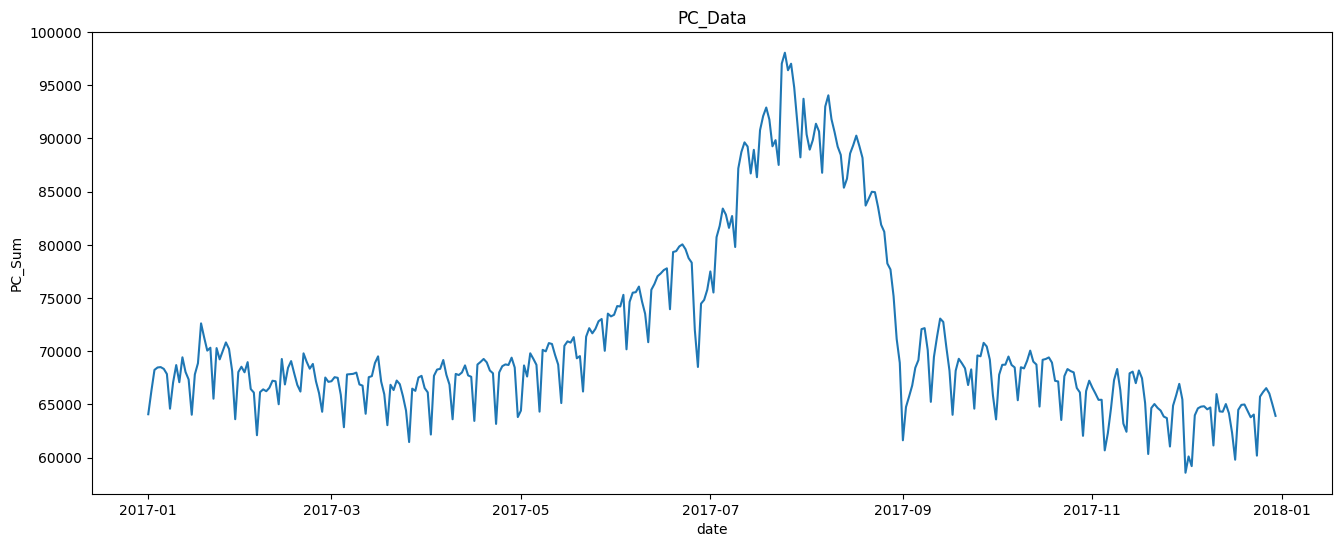

In [17]:
plt.figure(figsize = (16, 6))
plt.title("PC_Data")
sns.lineplot(data = df_mean['PC_Sum'])

<AxesSubplot: xlabel='Temperature', ylabel='PC_Sum'>

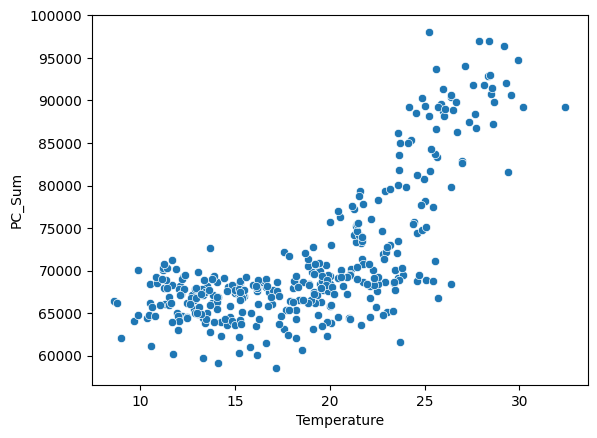

In [26]:
sns.scatterplot(x = df_mean["Temperature"], y = df_mean["PC_Sum"])

<AxesSubplot: xlabel='Temperature', ylabel='PC_Sum'>

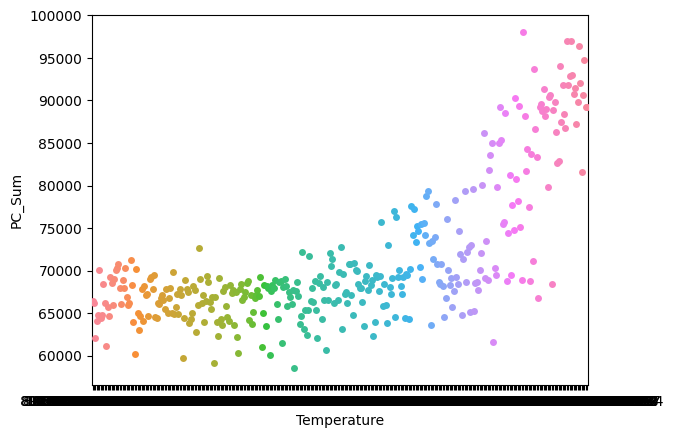

In [27]:
sns.swarmplot(x = df_mean["Temperature"], y = df_mean["PC_Sum"])

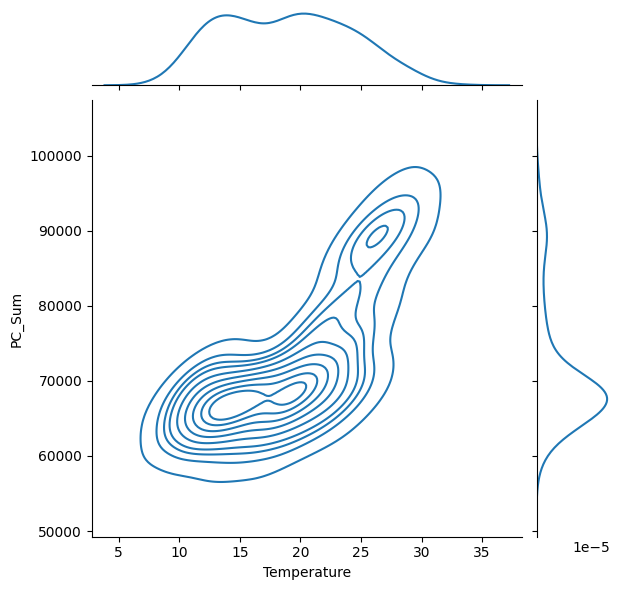

In [28]:
sns.jointplot(x = df_mean["Temperature"], y = df_mean["PC_Sum"], kind = "kde")

In [29]:
df.groupby(["date"]).PC_Sum.agg([len, min, max])

,len,min,max
date,,,
2017-01-01,144,39239.457920,92742.22601
2017-01-02,144,46472.355760,94463.96087
2017-01-03,144,47182.435040,95972.68604
2017-01-04,144,46678.031110,96763.44213
2017-01-05,144,47783.256130,97093.47152
...,...,...,...
2017-12-26,144,47227.585521,91870.18891
2017-12-27,144,46714.989603,92049.83765
2017-12-28,144,47002.860980,91681.51936


In [30]:
df.groupby(["time"]).PC_Sum.agg([len, min, max])

,len,min,max
time,,,
00:00:00,364,58477.21100,103937.37490
00:10:00,364,57569.36196,102295.48432
00:20:00,364,56528.94143,100845.32731
00:30:00,364,55436.65482,98830.59108
00:40:00,364,54328.21349,97720.25712
...,...,...,...
23:10:00,364,65665.90332,115314.27524
23:20:00,364,64538.79678,112340.85825
23:30:00,364,61334.99834,110853.34923


In [33]:
df.groupby(["date"]).PC_Sum.agg([len, min, max]).sort_values(by = "max", ascending = False)

,len,min,max
date,,,
2017-07-24,144,59886.076550,134208.14595
2017-07-27,144,60323.161290,133675.18577
2017-07-25,144,63164.682280,133111.37801
2017-07-26,144,62413.277670,132893.83815
2017-08-07,144,58781.793990,129536.30747
...,...,...,...
2017-11-11,144,42772.904356,85008.31294
2017-11-19,144,38560.863368,84776.35147
2017-11-05,144,38569.349483,84139.25443
